# Case 1: Ligações para o 911

Para este projeto estaremos analisando alguns dados de chamadas para o 911 do [Kaggle](https://www.kaggle.com/mchirico/montcoalert). Os dados contém os seguintes campos:

* `lat`: Variável String, Latitude
* `lng`: Variável String, Longitude
* `desc`: Variável String, Descrição da Chamada de Emergência
* `zip`: Variável String, CEP
* `title`: Variável String, Título
* `timeStamp`: Variável String, AAAA-MM-DD HH: MM:SS
* `twp`: Variável String, Township
* `addr`: Variável String, Endereço
* `e`: Variável String, variável Dummy (sempre 1)

Simplesmente acompanhe este notebook e tente completar as instruções ou responder as perguntas em negrito usando suas habilidades Python e Data Science!

> [Clique aqui](https://s3-sa-east-1.amazonaws.com/lcpi/7a9cfedf-d065-4a1b-8e71-50bd68c69ad2.csv) para fazer o download do dataset.

## Dados e Configuração

**Importar numpy e pandas**

In [8]:
import numpy as np
import pandas as pd

**Importe as bibliotecas de visualização gráfica.**

In [9]:
import seaborn as sns

**Leia o arquivo csv como um dataframe chamado df**

In [10]:
df = pd.read_csv('titanic.csv')

**Verifique a info() do df**

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


**Verifique o cabeçalho do df**

In [12]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


## Perguntas básicas

**Quais são os top 5 CEPs nas chamadas 911?**

In [13]:
#Top 5 frequências para CEP
df['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

**Quais são os 5 principais municípios nas chamadas 911?**

In [14]:
#Top 5 frequências para Municipios 
df['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

**Dê uma olhada na coluna 'title'. Quantos códigos de título exclusivos existem?**

In [15]:
#Contar o total de titles unicos 
np.size(df['title'].unique())

110

## Criando novos recursos

**Na coluna "title" existem "Razões / Departamentos" especificados antes do código do título. Estes são "EMS", "Fire" e "Traffic". Use .apply () com uma expressão lambda personalizada para criar uma nova coluna chamada "Razão" que contém esse valor de string.**

**Por exemplo, se o valor da coluna do título for EMS: BACK PAINS / BLESSOR, o valor da coluna Reason seria EMS.**

In [16]:
#Não há NaN
df['title'].isna().sum()

0

In [17]:
#Reason
#lambda x: "EMS" if (x[0]=='E') else ("Fire" if (x[0]=='G') else ("EMS" if (x[0]=='E') else "Traffic"))
df['Reason'] = df['title'].apply(lambda x: "EMS" if (x[0]=='E') else ("Fire" if (x[0]=='F') else  "Traffic"))
df

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS
...,...,...,...,...,...,...,...,...,...,...
99487,40.132869,-75.333515,MARKLEY ST & W LOGAN ST; NORRISTOWN; 2016-08-2...,19401.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:06:00,NORRISTOWN,MARKLEY ST & W LOGAN ST,1,Traffic
99488,40.006974,-75.289080,LANCASTER AVE & RITTENHOUSE PL; LOWER MERION; ...,19003.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:07:02,LOWER MERION,LANCASTER AVE & RITTENHOUSE PL,1,Traffic
99489,40.115429,-75.334679,CHESTNUT ST & WALNUT ST; NORRISTOWN; Station ...,19401.0,EMS: FALL VICTIM,2016-08-24 11:12:00,NORRISTOWN,CHESTNUT ST & WALNUT ST,1,EMS
99490,40.186431,-75.192555,WELSH RD & WEBSTER LN; HORSHAM; Station 352; ...,19002.0,EMS: NAUSEA/VOMITING,2016-08-24 11:17:01,HORSHAM,WELSH RD & WEBSTER LN,1,EMS


**Qual é o motivo mais comum para uma chamada do 911 com base nessa nova coluna?**

In [18]:
head = df['Reason'].value_counts()
head

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

**Agora use Seaborn para criar um gráfico baseado nos dados anteriores.**

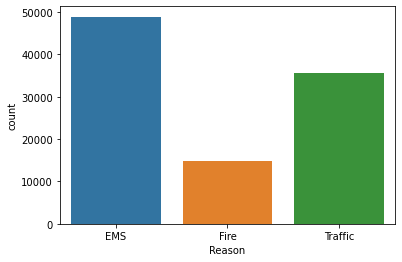

In [19]:
ax = sns.countplot(x="Reason", data=df)

In [23]:
df['timeStamp'].apply(lambda date_and_time: date_and_time.split())

0        [2015-12-10, 17:40:00]
1        [2015-12-10, 17:40:00]
2        [2015-12-10, 17:40:00]
3        [2015-12-10, 17:40:01]
4        [2015-12-10, 17:40:01]
                  ...          
99487    [2016-08-24, 11:06:00]
99488    [2016-08-24, 11:07:02]
99489    [2016-08-24, 11:12:00]
99490    [2016-08-24, 11:17:01]
99491    [2016-08-24, 11:17:02]
Name: timeStamp, Length: 99492, dtype: object

# Case 2: Titanic
---

Realize uma análise de dados sobre o dataset do Titanic. Para isso, como sugestão, você pode:

1. Aplicar um tratamento nos dados ausentes.
2. Analisar as métricas da estatística descritiva.
3. Realizar uma análise gráfica dos dados.
4. Extrair insigths a partir da análise das estatísticas de mortes/sobrevivência.

> [Clique aqui](https://s3-sa-east-1.amazonaws.com/lcpi/5729687e-ae14-4978-8cd7-7ef18277813d.csv) para fazer o download do dataset.

In [20]:
df1 = pd.read_csv('t1.csv')

In [21]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


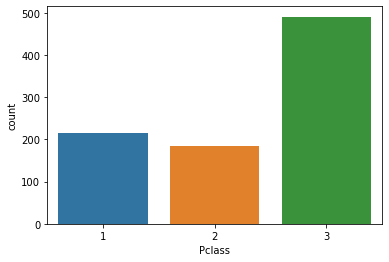

In [22]:
ax = sns.countplot(x="Pclass", data=df1)